# Database.py tutorial

This tutorial describes the functionality of the 'database' subpackage of the PAA repo. The subpackage incorporates the SubstrateDatabase class that provides a framework to load and query datasets of protease-substrate activity. 

To demo the package, we will load and query a rich dataset of 150 unique peptide substrates and their cleavage susceptibility against a diverse set of recombinant proteases, generated in the Bhatia Lab. All input files required query said datasets are made publically available and should comprise a valuable research for the sceintific community.

The **SubstrateDatabase class** enables to:
- Query protease-substrate activity assay data for proteases, substrates, or sequences of itnerest
- Identification of the substrates present in the database that are most robustly and specifically cleaved by a protease of interest
- Identification of the proteases that robustly and/or specifically cleave a peptide substrate of interest
- Assessment of the degree of similarity between a sequence of interest and sequences in the database
- Assessment of degree of similarity between all substrates in the database 
- Search for k-mer motifs across all sequences in the database

We will first import all necessary packages

In [31]:
pwd

'/Users/mariaalonso/Work/protease_activity_analysis'

In [32]:
cd ..

/Users/mariaalonso/Work


In [35]:
import protease_activity_analysis as paa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os

Next, we will define arguments to the SubstrateDatabase class. These are the user-defined inputs to the function:
- **data_files** : Input .csv files containing recombinant screening data to be incorported in the database. Here we will load 6 retrospective recombinant screen datafiles generated in the Bhatia Lab by screening different susbtrate libraries agianst a suit or recombinant proteases. Alternate datafiles to the ones presented here can be loaded with this class. The input .csv should consist of a matrix of substrates (rows) by proteases/samples (columns) with cells corresponding to some cleavage efficiency metric, data need not be normalized.
- **sequence_file**: .csv file containing all peptide sequences and peptide names for screened substrates. This file will chnage as a function of the data_files loaded.
- **names_file**: .pkl file that maps all names given to the same sequence to a unified substrate name. This is particularly relevant when more than one name is given to a unique sequence. This file will chnage as a function of the data_files loaded.
- **aa_dict_file**: .pkl file that maps amino acids to different colors using the RasMol 'shapely' color scheme, based on Robert Fletterick’s “Shapely models.” This generalizes across any input files but alternative color codes can be loaded by the user as desired.

We will also define an output directory **db_dir** to save output files generated.

In [36]:
# Define input files
data_files = ['data/screens/PAA/PAA_screens/Bhatia1_PAA.csv', 'data/screens/PAA/PAA_screens/Bhatia2_PAA.csv', 
             'data/screens/PAA/PAA_screens/Bhatia3_PAA.csv', 'data/screens/PAA/PAA_screens/Bhatia4_PAA.csv',
             'data/screens/PAA/PAA_screens/Bhatia5_PAA.csv', 'data/screens/PAA/PAA_screens/Bhatia6_PAA.csv']
sequence_file = 'data/screens/PAA/Peptide_Inventory_150.csv'
names_file = 'data/screens/PAA/names_dict.pkl'
aa_dict_file = 'data/screens/PAA/aa_dict_color_matched.pkl'

# Define output directory
db_dir = 'outputs/DatabaseTutorial'

#Create a new directory if it does not exist 
if not os.path.exists(db_dir):
    # Create a new directory because it does not exist 
    os.makedirs(db_dir)


## Exploring the SubstrateDatabase class
We will now create a new instance of the SubstrateDatabase class and assign this object to the local variable data.

In [5]:
# Load all relevant screening data from screens of interest
data = paa.database.SubstrateDatabase(data_files, sequence_file, names_file, aa_dict_file)

In instantiating the SubstrateDatabase class, the raw data is automatically processed and formatted to enable streamline searching by protease, substrate or sequence of interest:

- All raw activity data across input screens in loaded and zscored
- Proteases and substrates in each screen are identified
- Sequence data for each substrate is loaded
- Name maps for each substrate are loaded 


We can explore the processed data using different methods of the SubstrateDatabase class as illustrated below:

In [6]:
# Get names of screens being queried
names = data.screen_names
names

['Bhatia1_PAA',
 'Bhatia2_PAA',
 'Bhatia3_PAA',
 'Bhatia4_PAA',
 'Bhatia5_PAA',
 'Bhatia6_PAA']

/Users/mariaalonso/Work/protease_activity_analysis/protease_activity_analysis/database.py:570: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.


Protease rPLPro not found
Protease r3CLpro not found


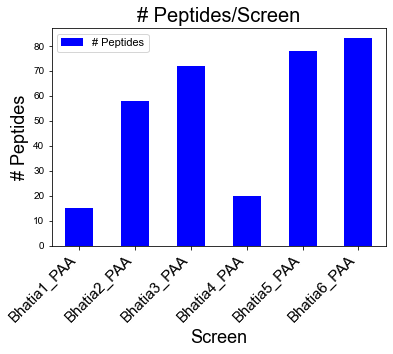

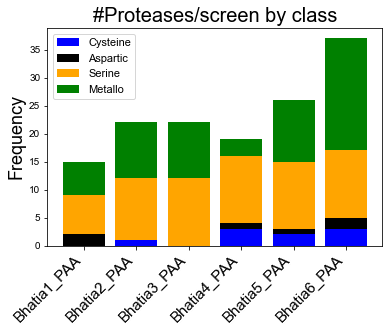

,Screen,# Peptides,# Proteases,Metallo,Aspartic,Cysteine,Serine
0,Bhatia1_PAA,15,15,6,2,0,7
1,Bhatia2_PAA,58,22,10,0,1,11
2,Bhatia3_PAA,72,22,10,0,0,12
3,Bhatia4_PAA,20,21,3,1,3,12
4,Bhatia5_PAA,78,26,11,1,2,12
5,Bhatia6_PAA,83,37,20,2,3,12


In [7]:
# Visualize screen metadata
data.summarize_screen(data.screen_names)

In [8]:
# View all available proteases for particular screen 
prot = data.get_screen_proteases('Bhatia1_PAA')
prot

['MMP1',
 'MMP3',
 'MMP11',
 'MMP12',
 'MMP13',
 'PRSS22',
 'PRSS3',
 'PRSS8',
 'ACE2',
 'F7',
 'NAPSA',
 'CTSD',
 'KLK6',
 'KLK13',
 'KLK14']

In [9]:
# View all unique proteases amongst all screens
unique_prot = []
for screen in names:
    prot = data.get_screen_proteases(screen)
    unique_prot.append(prot)
unique_prot = set(np.concatenate(unique_prot, axis=0))
print('Number of unique proteases in database:', len(unique_prot))
unique_prot

Number of unique proteases in database: 77


{'ACE2',
 'ADAM12',
 'ADAM28',
 'ADAM8',
 'ADAM9',
 'ADAMTS1',
 'ADAMTS15',
 'CASP1',
 'CTSA',
 'CTSB',
 'CTSD',
 'CTSE',
 'CTSG',
 'CTSK',
 'CTSS',
 'CTSZ',
 'ELANE',
 'F10',
 'F2',
 'F7',
 'F9',
 'FAP',
 'FURIN',
 'GZMA',
 'GZMB',
 'GZMH',
 'GZMK',
 'HAT',
 'HGFAC',
 'HPN',
 'HTRA1',
 'KLK1',
 'KLK11',
 'KLK12',
 'KLK13',
 'KLK14',
 'KLK2',
 'KLK3',
 'KLK4',
 'KLK5',
 'KLK6',
 'KLK8',
 'LGMN',
 'MME',
 'MMP1',
 'MMP10',
 'MMP11',
 'MMP12',
 'MMP13',
 'MMP14',
 'MMP15',
 'MMP17',
 'MMP19',
 'MMP2',
 'MMP24',
 'MMP26',
 'MMP3',
 'MMP7',
 'MMP8',
 'MMP9',
 'NAPSA',
 'PAPPA',
 'PAPPA2',
 'PCSK1',
 'PCSK2',
 'PLAT',
 'PLAU',
 'PRSS1',
 'PRSS2',
 'PRSS22',
 'PRSS3',
 'PRSS8',
 'PRTN3',
 'ST14',
 'TMPRSS11E',
 'r3CLpro',
 'rPLPro'}

In [10]:
# Generate a map of recombinant proteases and their corresponding protease class
spec_dict = data.get_protease_class('Bhatia1_PAA')
spec_dict

,Protease,Class
0,MMP1,Metallo
1,MMP3,Metallo
2,MMP11,Metallo
3,MMP12,Metallo
4,MMP13,Metallo
5,PRSS22,Serine
6,PRSS3,Serine
7,PRSS8,Serine
8,ACE2,Metallo
9,F7,Serine


In [11]:
# View all available substrates for particular screen 
data.get_screen_substrates('Bhatia1_PAA')

['S16',
 'S19',
 'S22',
 'S24',
 'S4',
 'S51',
 'S71',
 'S72',
 'S73',
 'S74',
 'S75',
 'S76',
 'S77',
 'S78',
 'S79']

## Searching for a protease of interest
Beyond exploring the contents stored in **data** we can query the dataset for a protease of interest, we will exemplify the main protease-search functionalities using MMP13.

- **data.search_protease('MMP13', z_threshold=2, out_dir=db_dir, plot_hist=True)**: will give you an overview of the screening data available across sscreens for a protease of interest. It will determine which screens contain data against the protease of interest, generate a histogram of z-score distributions for all substrates against the protease of interest, and return a DataFrame containing substrates with z-score higher than the user-defined z-score threshold.
- **data.get_top_hits('MMP13', 'protease', top_k=3, out_dir=db_dir, z_threshold=None)**: will retrieve the top cleaved substrates for a protease of interest as defined by a k- **or** z-score threshold. It will also retrieve and print the z-scores and sequences (color-coded by RasMol shapely colors) of the top cleaved substrates to help interpret hits. It will also return data for individual screens as well as across all screens.
- **data.specificity_analysis(db_dir, protease='MMP13', substrate=None, threshold=4, plot=True, cmap=True)**: queries the specificity of a protease of interest by generating **specificty plots** for each screen in which a protease of interest was included. Substrates scoring high along the x-axis and y-axis are efficiently and specifically cleaved, respectively, by the protease of interest. **Note** that all cleavage efficiency and specificity measures are relative to the other substrates and proteases in the screen. Raw cleavage values are overlaid using a color map to help interpret z-scores. Substrates with z-score>z_threshold in either axis will be labelled.

MMP13 found in Bhatia1_PAA
MMP13 found in Bhatia2_PAA
MMP13 found in Bhatia3_PAA
MMP13 found in Bhatia5_PAA
MMP13 found in Bhatia6_PAA


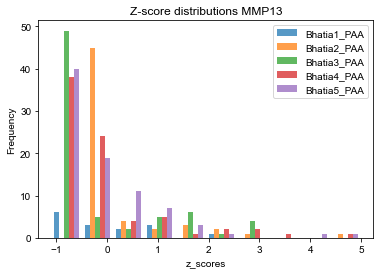

,Bhatia1_PAA,Bhatia2_PAA,Bhatia3_PAA,Bhatia5_PAA,Bhatia6_PAA
S110,NaN,2.064783,NaN,2.696652,NaN
S111,NaN,2.103476,NaN,NaN,NaN
S118,NaN,NaN,NaN,2.541186,4.305619
S131,NaN,NaN,NaN,2.208370,NaN
S24,NaN,NaN,NaN,3.237900,NaN
S4,NaN,NaN,2.690430,NaN,NaN
S7,NaN,NaN,NaN,2.682638,NaN
S71,NaN,4.479478,NaN,NaN,NaN
S73,NaN,NaN,2.110120,NaN,NaN
S76,NaN,NaN,3.125480,4.637912,4.999768


In [12]:
# For a protease of interest find all relevant screening data. Can set a z-score or k- threshold
mmp13_df = data.search_protease('MMP13', z_threshold=2, out_dir=db_dir, plot=True)

# Visualize result from search protease with z_threshold>2
display(mmp13_df)

In [13]:
# Get top cleaved substrates for protease of interest
MMP13_individual, MMP13_overall = data.get_top_hits('MMP13', 'protease', k=5, out_dir=db_dir, z_threshold=None)

display(MMP13_overall)

MMP13 found in Bhatia1_PAA
MMP13 found in Bhatia2_PAA
MMP13 found in Bhatia3_PAA
MMP13 found in Bhatia5_PAA
MMP13 found in Bhatia6_PAA
Top hits for MMP13 in Bhatia1_PAA:

S78: GGP[Cha]G[Cys(Me)]HAGC - GGP[Cha]G[Cys(Me)]HAGC

S4: GPLGLRSWG - GPLGLRSWG

S77: GAPFEMSAG - GAPFEMSAG

S79: GGPVGLIG - GGPVGLIG

S76: GPLGMRG - GPLGMRG

Top hits for MMP13 in Bhatia2_PAA:
S71: GGPQGIWGQ - GGPQGIWGQ

S79: GGPVGLIG - GGPVGLIG

S111: GSPLAQAVRSSG - GSPLAQAVRSSG


S110: GLAQA[Phe(homo)]RSG - GLAQA[Phe(homo)]RSG

S4: GPLGLRSWG - GPLGLRSWG

Top hits for MMP13 in Bhatia3_PAA:
S76: GPLGMRG - GPLGMRG

S77: GAPFEMSAG - GAPFEMSAG

S4: GPLGLRSWG - GPLGLRSWG

S8: GPLGLRG - GPLGLRG

S73: GGPLGVRGK - GGPLGVRGK

Top hits for MMP13 in Bhatia5_PAA:
S76: GPLGMRG - GPLGMRG

S24: GRPLALWESQG - GRPLALWESQG


S110: GLAQA[Phe(homo)]RSG - GLAQA[Phe(homo)]RSG

S7: GPLGFRVG - GPLGFRVG

S118: GAPFEFSAG - GAPFEFSAG

Top hits for MMP13 in Bhatia6_PAA:
S76: GPLGMRG - GPLGMRG

S118: GAPFEFSAG - GAPFEFSAG


S110: GLAQA[Phe(homo

,Scores,Source,Sequence
index,,,
S76,4.999768,Bhatia6_PAA,GPLGMRG
S76,4.637912,Bhatia5_PAA,GPLGMRG
S71,4.479478,Bhatia2_PAA,GGPQGIWGQ
S118,4.305619,Bhatia6_PAA,GAPFEFSAG
S24,3.237900,Bhatia5_PAA,GRPLALWESQG


MMP13 found in Bhatia1_PAA
MMP13 found in Bhatia2_PAA
MMP13 found in Bhatia3_PAA
MMP13 found in Bhatia5_PAA
MMP13 found in Bhatia6_PAA


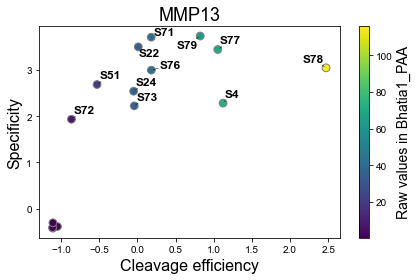

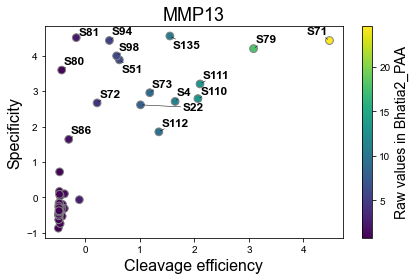

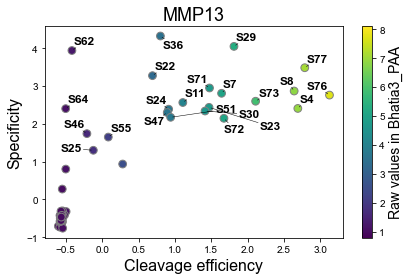

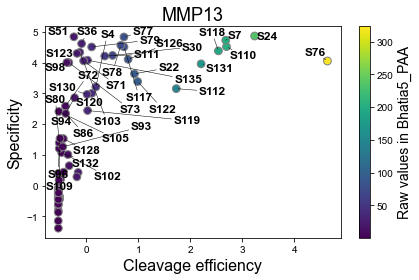

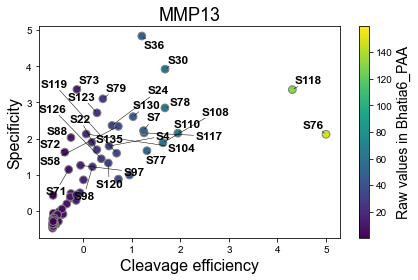

In [14]:
# Query the specificity of a protease of interest across all screens in the database.e.g. MMP13
data.specificity_analysis(db_dir, sample='MMP13', threshold=1, close_plot=False, cmap=True)

## Searching for a substrate of interest

In order to facilitate the search for a substrate of interest it is important to map back and forth between substrate names and sequences. To this end, we provide two useful functions: 
- **data.get_sequence_of_name('PP15')**: maps substrate name to sequence
- **data.get_name_of_sequence('GGGSGRSANAKG'**): maps a sequence of interest to all given names for this sequence

In [15]:
# View sequence for substrates of interest
data.get_sequence_of_name('PP15')

'GRPLALWESQG'

In [16]:
# View name of substrates of interest
data.get_name_of_sequence('GGGSGRSANAKG')

(15    S16
 Name: Name, dtype: object,
 15    [PP08, PQ2, LQ20, BV08, TQ39]
 Name: Names, dtype: object)

If the sequence is not identical to any of the substrates screened in the database, we can search for similar substrates using the **data.find_similar_substrates** function. 

Here we demonstrate this by looking up the 5 most similar substrates to 'GGPLG' as defined by the 'Partial Similarity Ratio'.


In [17]:
# Return the top 5 most similar substrates in the database to substarte of interest ('GGPLG')
sim_m_sorted, top_k = data.find_similar_substrates('GGPLG', True, 'Partial Similarity Ratio', 5)
top_k

Queried seq:
GGPLG - GGPLG

S94: GGPLGLRWW - GGPLGLRWW

S73: GGPLGVRGK - GGPLGVRGK

S57: GGGPLGLARG - GGGPLGLARG

S76: GPLGMRG - GPLGMRG

S138: GGHPGGPQG - GGHPGGPQG



,Name,Sequence,Composition,Similarity Ratio,Partial Similarity Ratio
93,S94,GGPLGLRWW,Natural,71,100
72,S73,GGPLGVRGK,Natural,71,100
56,S57,GGGPLGLARG,Natural,67,100
75,S76,GPLGMRG,Natural,67,80
137,S138,GGHPGGPQG,Natural,57,80


Once we have identified the name of the substrate we want to look up, we can query the dataset for a substrate of interest. We will exemplify the main protease-search functionalities using S4. Parallel functions to those described for searching for a protease are avialable for substrates, namely:

- **data.get_top_hits**. Find top k or proteases with z-score>z-threshold in any screen for substrate of interest. Both individual and overall top proteases are returned.
- **data.specificity_analysis**. In this plot, each point represent a protease in the screen. Proteases scoring high along the x-axis cleave S4 efficiently. Proteases scoring high along the y-axis score S4 specifically over other substrates in the screen. In addition to overlaying a color map of absolute cleavage values, proteases with z-scores>z-threshold in either ecis are color-coded by protease class.


In [18]:
# Get top hits for protease that most efficiently cleave peptide of interest
S4_individual, S4_overall = data.get_top_hits('S4', 'substrate', k=3, out_dir=None, z_threshold=None)

S4 found in Bhatia1_PAA
S4 found in Bhatia2_PAA
S4 found in Bhatia3_PAA
S4 found in Bhatia5_PAA
S4 found in Bhatia6_PAA
Top hits for S4 in Bhatia1_PAA:
KLK6
KLK13
PRSS3
Top hits for S4 in Bhatia2_PAA:
F2
MMP13
MMP2
Top hits for S4 in Bhatia3_PAA:
F2
HAT
FAP
Top hits for S4 in Bhatia5_PAA:
F2
GZMA
MMP15
Top hits for S4 in Bhatia6_PAA:
GZMA
FAP
MMP15
Top hits for S4 overall. Hit, Source, Score:
F2, Bhatia3_PAA, 5.63
KLK6, Bhatia1_PAA, 3.24
F2, Bhatia5_PAA, 3.22


S4 found in Bhatia1_PAA
S4 found in Bhatia2_PAA
S4 found in Bhatia3_PAA
S4 found in Bhatia5_PAA
S4 found in Bhatia6_PAA


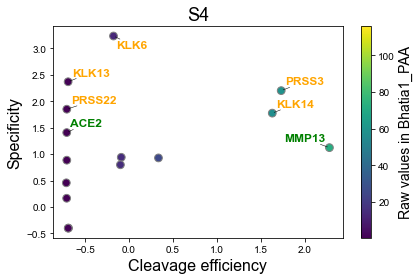

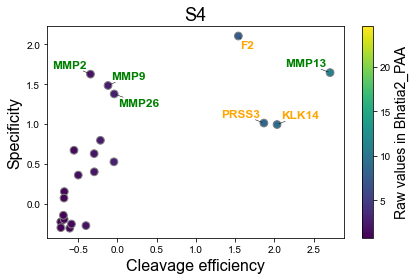

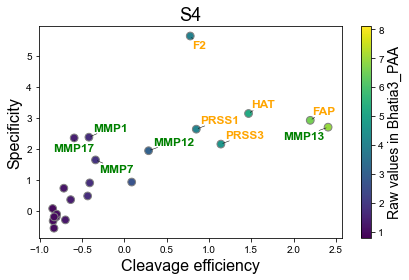

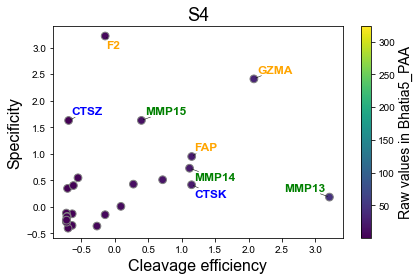

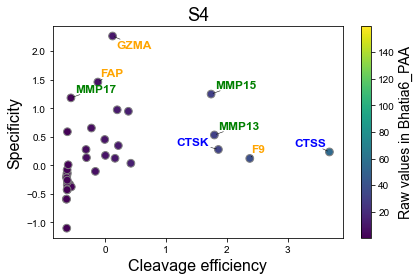

In [20]:
# Query the specificity of a substrate of interest across all screens in the database.e.g. S4
data.specificity_analysis(db_dir, sample=None, substrate='S4', threshold=1, close_plot=False, cmap=True)

To use this function to help interpret data from an in vivo experiment, we will generate specificity plots for substrates that were found to be differentially cleaved in KP mice at 7.5 weeks, namely:
- PP02, PP03, PP09 and PP12: preferentially cleaved in KP mice
- PP06: preferentially cleaved in healthy control mice

In [22]:
# Query specificity of PP02, PP03, PP06, PP09 and PP12, setting 'close_plot=True' will 
# speed up the run but will still save plots in the designated 'db_dir'

sub_list = ['PP02', 'PP03', 'PP06', 'PP09', 'PP12']

for sub in sub_list:
    data.specificity_analysis(db_dir, sample=None, substrate=sub, threshold=2, close_plot=True, cmap=True)

Searching by alternative names...
S79 found in Bhatia1_PAA
S79 found in Bhatia2_PAA
S79 found in Bhatia5_PAA
S79 found in Bhatia6_PAA
Substrate found under unified name S79
Searching by alternative names...
S72 found in Bhatia1_PAA
S72 found in Bhatia2_PAA
S72 found in Bhatia3_PAA
S72 found in Bhatia5_PAA
S72 found in Bhatia6_PAA
Substrate found under unified name S72
Searching by alternative names...
S74 found in Bhatia1_PAA
S74 found in Bhatia2_PAA
S74 found in Bhatia3_PAA
S74 found in Bhatia4_PAA
S74 found in Bhatia5_PAA
S74 found in Bhatia6_PAA
Substrate found under unified name S74
Searching by alternative names...
S22 found in Bhatia1_PAA
S22 found in Bhatia2_PAA
S22 found in Bhatia3_PAA
S22 found in Bhatia5_PAA
S22 found in Bhatia6_PAA
Substrate found under unified name S22
Searching by alternative names...
S76 found in Bhatia1_PAA
S76 found in Bhatia3_PAA
S76 found in Bhatia4_PAA
S76 found in Bhatia5_PAA
S76 found in Bhatia6_PAA
Substrate found under unified name S76


## Streamlining the search for several proteases or substrates of interest

To easily determine whether lists of proteases or substartes of interest were included in at least one of the screens, we have also implemented **data.find_proteases(prot_list)**  and **data.find_substrates(subs_list)** methods to the class. 

**Notes**:
- **data.find_proteases(prot_list)**: protease names are stored with human genes names as all proteases screened were human recombinant proteases. In the example below, all but Cathepsin H were included in at least one of the screens. 
- **data.find_substrates(subs_list)**: substrate names correspond to substrate names given by trainees in the Bhatia Lab and as available in our published work. If multiple names exist for a given substrate, the class will use 'names_file' to ensure it identifies all given names for a substarte of interest and maps it to the unified name (encoded from S1-S150) used in the SubstrateDatabase instance.

In [6]:
# Check whether proteases of interest are in the dataset
prot_list = ['MMP13', 'MMP15', 'CTSB', 'CTSH']

found_prot = data.find_proteases(prot_list)
print(found_prot)


CTSH not found in database
['MMP13', 'MMP15', 'CTSB']


In [7]:
# Check whether substrates of interest are in the dataset
subs_list = [ 'PQ1', 'S2', 'S300']

found_sub = data.find_substrates(subs_list)
print(found_sub)

Substrate PQ1 is encoded by S26
Substrate S300 not found in database
['S26', 'S2']


# Explore sequence diversity of substrate library
In interpreting data from recombinant protease screens or activity assays it is important to have an understanding of the diversity in sequence space of substrates screened and the degree of overlap between substrates of interest. 

As metrics of similarity in sequence space, we have implemented functions that support two different metrics of sequence similarity:
- **String similarity** as a function of edit distace is supported by **data.get_similarity_matrix()**. The function will compute pairwise similarity scores, as defined by the 'Levenschtein edit distance' or the 'Modified Levenschtein edit distance' between all substrates in the database and perform hierarchical clustering on said similarity scores. In this way, substrates that cluster together in the heatmap will share a high degree of sequence similarity. Pariwise similarity matrices as DataFrames are also returned.
- **kmer-related analyses** are supported by a range of functions including: 
- **data.run_kmer_analysis([3,4,5,6,7,8])**: generates all kmers of lengths 3-8 for all substrates in the dataset
- **data.get_kmer_dict(4)**: allows to query kmer dictionary of length k (e.g.4)
- **data.get_kmer_overlap(4)**: for each kmer of length k (e.g.4) find all substrates that contain said kmer
- **data.summarize_kmer(kmer_len = 3, top_k = 20)**: return kmer distribution and return top k ovver-represented kmers
- **data.search_kmer('PLGL', True, data.aa_dict)**:


/Users/mariaalonso/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
/Users/mariaalonso/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S141,S142,S143,S144,S145,S146,S147,S148,S149,S150
S1,100.0,78.0,89.0,33.0,30.0,40.0,47.0,38.0,20.0,40.0,...,32.0,30.0,48.0,36.0,27.0,19.0,32.0,32.0,10.0,38.0
S2,78.0,100.0,78.0,33.0,50.0,50.0,47.0,38.0,30.0,40.0,...,32.0,30.0,48.0,45.0,27.0,32.0,32.0,32.0,10.0,50.0
S3,89.0,78.0,100.0,33.0,40.0,50.0,47.0,38.0,30.0,40.0,...,32.0,30.0,38.0,36.0,27.0,26.0,32.0,32.0,10.0,38.0
S4,33.0,33.0,33.0,100.0,50.0,40.0,71.0,88.0,30.0,30.0,...,42.0,30.0,48.0,45.0,45.0,32.0,42.0,42.0,14.0,38.0
S5,30.0,50.0,40.0,50.0,100.0,45.0,32.0,33.0,27.0,36.0,...,19.0,18.0,26.0,42.0,33.0,30.0,19.0,29.0,14.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S146,19.0,32.0,26.0,32.0,30.0,36.0,27.0,28.0,30.0,24.0,...,19.0,36.0,29.0,34.0,29.0,100.0,38.0,31.0,36.0,41.0
S147,32.0,32.0,32.0,42.0,19.0,38.0,44.0,47.0,48.0,38.0,...,50.0,48.0,45.0,35.0,26.0,38.0,100.0,70.0,14.0,35.0
S148,32.0,32.0,32.0,42.0,29.0,38.0,44.0,47.0,38.0,38.0,...,60.0,38.0,45.0,43.0,43.0,31.0,70.0,100.0,14.0,35.0
S149,10.0,10.0,10.0,14.0,14.0,18.0,10.0,15.0,14.0,18.0,...,19.0,32.0,13.0,30.0,17.0,36.0,14.0,14.0,100.0,15.0


<Figure size 432x288 with 0 Axes>

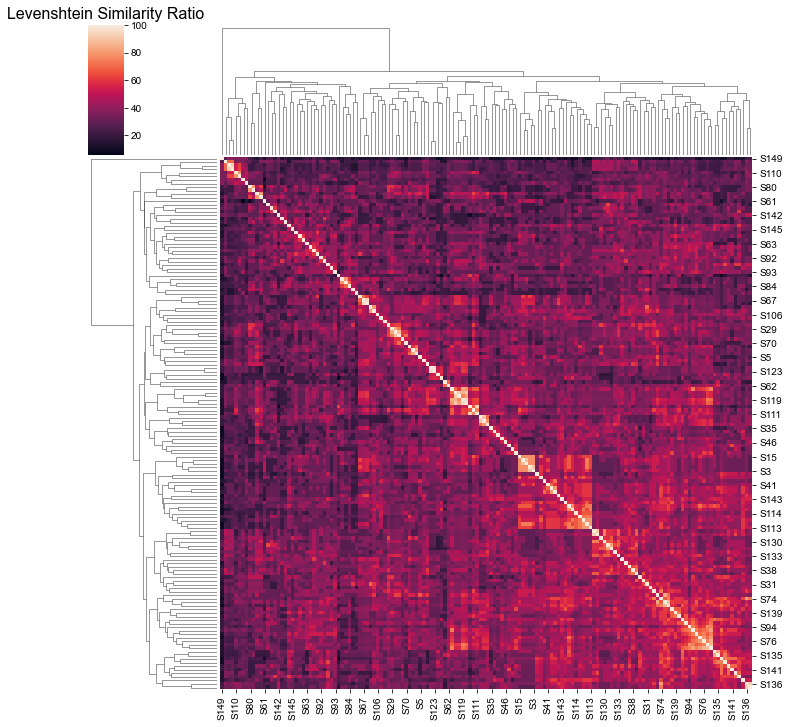

<Figure size 432x288 with 0 Axes>

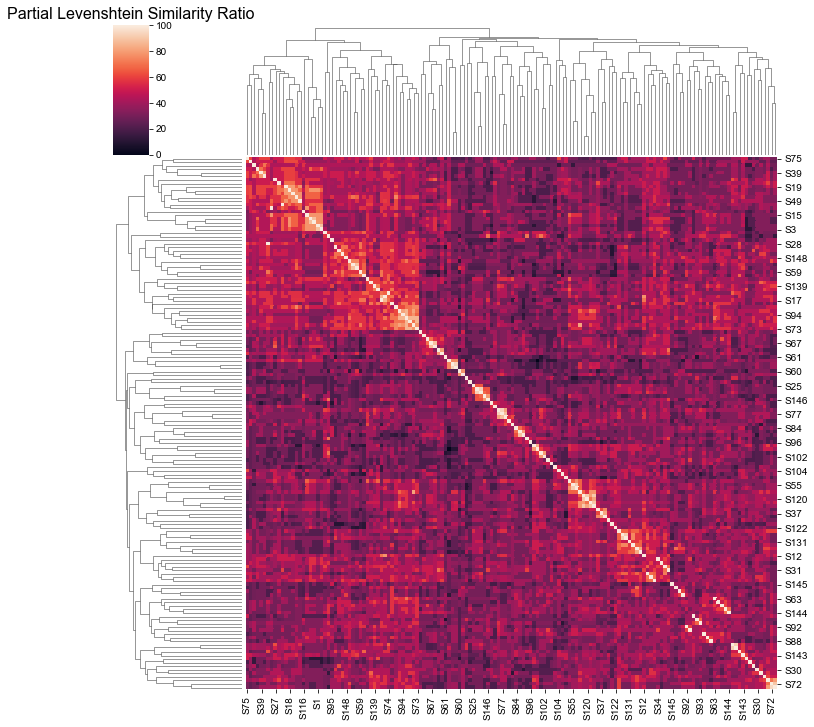

In [6]:
# Generate pairwise similarity matrix between all peptides of in the database
sim_m, sim_par_m, clus_sim, clus_sim_p = data.get_similarity_matrix(out_dir=db_dir, close_plot=False)
display(sim_m)

In [6]:
# Run kmer analysis on dataset for kmer lengths of interest [3,4,5,6,7,8]
data.run_kmer_analysis([3,4,5,6,7,8])

Generating kmer dictionary for length 3
Generating kmer overlap dictionary for length 3
Number of unique kmers is: 728
Generating kmer dictionary for length 4
Generating kmer overlap dictionary for length 4
Number of unique kmers is: 827
Generating kmer dictionary for length 5
Generating kmer overlap dictionary for length 5
Number of unique kmers is: 758
Generating kmer dictionary for length 6
Generating kmer overlap dictionary for length 6
Number of unique kmers is: 659
Generating kmer dictionary for length 7
Generating kmer overlap dictionary for length 7
Number of unique kmers is: 541
Generating kmer dictionary for length 8
Generating kmer overlap dictionary for length 8
Number of unique kmers is: 413
Completed kmer analysis for all lengths provided.


In [7]:
# Retrieve relevant kmer_dict for k=4, keys are substrates and keys are all possible consecutive kmers of k=4 length
data.get_kmer_dict(4)

{'S1': ['GRQR', 'RQRR', 'QRRV', 'RRVV', 'RVVG', 'VVGG'],
 'S2': ['GRQA', 'RQAR', 'QARA', 'ARAV', 'RAVG', 'AVGG'],
 'S3': ['GRRA', 'RRAR', 'RARV', 'ARVV', 'RVVG', 'VVGG'],
 'S4': ['GPLG', 'PLGL', 'LGLR', 'GLRS', 'LRSW', 'RSWG'],
 'S5': ['GWEA', 'WEAV', 'EAVR', 'AVRS', 'VRSA', 'RSAM', 'SAMW', 'AMWG'],
 'S6': ['GWIG', 'WIGF', 'IGFR', 'GFRN', 'FRNA', 'RNAG', 'NAGA', 'AGAG'],
 'S7': ['GPLG', 'PLGF', 'LGFR', 'GFRV', 'FRVG'],
 'S8': ['GPLG', 'PLGL', 'LGLR', 'GLRG'],
 'S9': ['GATP', 'ATPK', 'TPKI', 'PKIF', 'KIFN', 'IFNT', 'FNTE', 'NTEG'],
 'S10': ['GETR', 'ETRI', 'TRII', 'RIIK', 'IIKG', 'IKGF', 'KGFE', 'GFEG'],
 'S11': ['GPLA', 'PLAL', 'LALW', 'ALWA', 'LWAR', 'WARG'],
 'S12': ['GALV', 'ALVP', 'LVPR', 'VPRG', 'PRGS', 'RGSA', 'GSAG'],
 'S13': ['GGLV', 'GLVP', 'LVPR', 'VPRG', 'PRGS', 'RGSG'],
 'S14': ['GRQA', 'RQAR', 'QARQ', 'ARQV', 'RQVG', 'QVGG'],
 'S15': ['GLQA', 'LQAR', 'QARV', 'ARVV', 'RVVG', 'VVGG'],
 'S16': ['GGGS',
  'GGSG',
  'GSGR',
  'SGRS',
  'GRSA',
  'RSAN',
  'SANA',
  'ANAK',
  'N

In [8]:
# Retrieve relevant kmer_overlap for k=4, keys are kmers of length k=4 and keys are all substrates in the database containing said kmer
data.get_kmer_overlap(4)

{'AAAT': ['S89'],
 'AAEA': ['S80', 'S102'],
 'AAFA': ['S150'],
 'AAKG': ['S31'],
 'AALI': ['S37', 'S43'],
 'AALT': ['S131'],
 'AANL': ['S108'],
 'AATQ': ['S89'],
 'AEAI': ['S80', 'S102'],
 'AEQQ': ['S67', 'S68'],
 'AFAG': ['S150'],
 'AFRR': ['S107'],
 'AFRS': ['S23'],
 'AGAG': ['S6'],
 'AGGA': ['S52'],
 'AGIL': ['S91'],
 'AGLV': ['S97'],
 'AGPR': ['S31'],
 'AGgG': ['S41'],
 'AIEF': ['S70'],
 'AISD': ['S80'],
 'AKIR': ['S32', 'S33'],
 'AKKG': ['S32'],
 'ALAV': ['S122'],
 'ALEE': ['S120'],
 'ALEK': ['S26'],
 'ALIT': ['S43'],
 'ALIV': ['S37'],
 'ALKQ': ['S144'],
 'ALLR': ['S63'],
 'ALNV': ['S81'],
 'ALTA': ['S131'],
 'ALVP': ['S12'],
 'ALWA': ['S11'],
 'ALWE': ['S24'],
 'ALWR': ['S119', 'S121'],
 'AMWG': ['S5'],
 'ANAK': ['S16'],
 'ANLT': ['S108'],
 'ANVE': ['S88'],
 'APFE': ['S29', 'S77', 'S118'],
 'AQAF': ['S23'],
 'AQAV': ['S55', 'S111'],
 'AQKS': ['S66', 'S69'],
 'AQMG': ['S52'],
 'AQPD': ['S81'],
 'AQTL': ['S56'],
 'ARAL': ['S144'],
 'ARAV': ['S2'],
 'ARDF': ['S21'],
 'ARLV': ['S87']

,Frequency
GPLG,7
RIVG,6
IVGG,6
PLAL,5
LALW,4
RPLA,4
PLGL,4
VVGG,4
GRPL,4
RVVG,4


<Figure size 432x288 with 0 Axes>

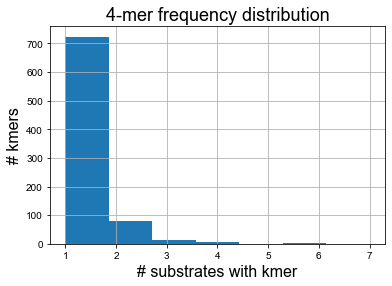

In [10]:
# Summarize relevant kmer data
kmer_f_sorted, kmer_f_sorted_filtered = data.summarize_kmer(kmer_len=4, top_k=20, out_dir=db_dir, close_plot=False)
display(kmer_f_sorted_filtered)

In [11]:
# Search example kmer of interest 'PLGL' using search_kmer() 
print('Queried kmer:')
print('PLGL')
print('\n')
PLGL_info = data.search_kmer('PLGL', True, data.aa_dict)
print(PLGL_info)


Queried kmer:
PLGL


Found S4: GPLGLRSWG - GPLGLRSWG

Found S8: GPLGLRG - GPLGLRG

Found S57: GGGPLGLARG - GGGPLGLARG

Found S94: GGPLGLRWW - GGPLGLRWW

  Peptide    Sequence
0      S4   GPLGLRSWG
1      S8     GPLGLRG
2     S57  GGGPLGLARG
3     S94   GGPLGLRWW
